# Data

 https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market


# Description

* 34857 rows, 21 cols
* Numerical & Categorical
* Missing Values included (Need Different Imputations)
* Outliers included
* Can be used for EDA & Visualization or Prediction

# Project: Melbourne Housing Market

Table of Contents:

. Introduction                                                                                                                                                                                                                   

. Data Wrangling


. Exploratory Data Analysis


. Conclusions

# Introduction

### Melbourne's housing dataset contains information on various aspects of the real estate market in Melbourne, Australia. This dataset includes data on housing prices, sales counts, distance from the city center, building-to-land ratios, and property types such as houses, townhouses, and units. The data provides insights into the real estate market trends and can be used to analyze the market and make informed decisions about buying or selling properties in Melbourne. 

### The following questions will be explored during the analysis:

### 1)What are the top 10 suburbs with the highest number of sold properties?
### 2) Which are the top 10 suburbs with the highest average property prices?
### 3) How do the prices and sales of modern properties compare to those of historic properties?
### 4) How does the age of a property affect its price and sales compared to modern and historic properties?
### 5) Is there a correlation between the price and sales of a property regarding different regions?
### 6) Where should I buy a 2 bedroom unit?
### 7) Is there a relationship between property prices and sales and their distance from the city center?
### 8) How do the different regions compare in terms of their distance from the city center and property prices and sales?
### 9) Is there a correlation between the distance of a property from the city center and its building to land ratio?
### 10) How does the number of units of each housing type affect their prices, and what is the quantity and ratio of each type of unit in the area?
### 11) What is the correlation between the number of rooms in a property and its sales count and price?



In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline


# Data Wrangling


In [4]:
melbourne_housing=pd.read_csv("C:/Users/moham/Downloads/Melbourne_housing_FULL.csv/Melbourne_housing_FULL.csv")

In [5]:
melbourne_housing.head(10)

Suburb             Address  Rooms Type      Price Method  SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
5  Abbotsford    40 Federation La      3    h   850000.0     PI   Biggin   
6  Abbotsford         55a Park St      4    h  1600000.0     VB   Nelson   
7  Abbotsford        16 Maugie St      4    h        NaN     SN   Nelson   
8  Abbotsford        53 Turner St      2    h        NaN      S   Biggin   
9  Abbotsford        99 Turner St      2    h        NaN      S  Collins   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
5  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
6  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
7  6/08/2016       2.5    3067.0  ...       2.0  2.0     400.0         220.0   
8  6/08/2016       2.5    3067.0  ...       1.0  2.0     201.0           NaN   
9  6/08/2016       2.5    3067.0  ...       2.0  1.0     202.0           NaN   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   
5        NaN  Yarra City Council  -37.7969    144.9969  Northern Metropolitan   
6     2014.0  Yarra City Council  -37.8072    144.9941  Northern Metropolitan   
7     2006.0  Yarra City Council  -37.7965    144.9965  Northern Metropolitan   
8     1900.0  Yarra City Council  -37.7995    144.9974  Northern Metropolitan   
9     1900.0  Yarra City Council  -37.7996    144.9989  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  
5        4019.0  
6        4019.0  
7        4019.0  
8        4019.0  
9        4019.0  

[10 rows x 21 columns]

In [6]:
melbourne_housing.columns=melbourne_housing.columns.str.replace('*','').str.lower()
melbourne_housing.columns

C:\Users\moham\AppData\Local\Temp\ipykernel_20732\1290805889.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  melbourne_housing.columns=melbourne_housing.columns.str.replace('*','').str.lower()


Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

In [7]:
melbourne_housing

suburb             address  rooms type      price method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             sellerg        date  distance  postcode  ...  bathroom  car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       landsize  buildingarea  yearbuilt               councilarea lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       longtitude             regionname propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

In [8]:
melbourne_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34857 non-null  object 
 1   address        34857 non-null  object 
 2   rooms          34857 non-null  int64  
 3   type           34857 non-null  object 
 4   price          27247 non-null  float64
 5   method         34857 non-null  object 
 6   sellerg        34857 non-null  object 
 7   date           34857 non-null  object 
 8   distance       34856 non-null  float64
 9   postcode       34856 non-null  float64
 10  bedroom2       26640 non-null  float64
 11  bathroom       26631 non-null  float64
 12  car            26129 non-null  float64
 13  landsize       23047 non-null  float64
 14  buildingarea   13742 non-null  float64
 15  yearbuilt      15551 non-null  float64
 16  councilarea    34854 non-null  object 
 17  lattitude      26881 non-null  float64
 18  longti

In [9]:
melbourne_housing.isnull().sum()

suburb               0
address              0
rooms                0
type                 0
price             7610
method               0
sellerg              0
date                 0
distance             1
postcode             1
bedroom2          8217
bathroom          8226
car               8728
landsize         11810
buildingarea     21115
yearbuilt        19306
councilarea          3
lattitude         7976
longtitude        7976
regionname           3
propertycount        3
dtype: int64

In [10]:
def fill_missing(melbourne_housing):
    quant_cols = [ col for col in melbourne_housing.columns if melbourne_housing[col].dtypes != 'O']
    cat_cols = [ col for col in melbourne_housing.columns if melbourne_housing[col].dtypes == 'O']
    fill_median = lambda col : col .fillna(col.median())
    fill_mode = lambda col : col.fillna(col.mode()[0])
    melbourne_housing[quant_cols]= melbourne_housing[quant_cols].apply(fill_median)
    melbourne_housing[cat_cols]= melbourne_housing[cat_cols].apply(fill_mode)
    return melbourne_housing

In [11]:
df2 = fill_missing(melbourne_housing)
df2.isnull().sum()

suburb           0
address          0
rooms            0
type             0
price            0
method           0
sellerg          0
date             0
distance         0
postcode         0
bedroom2         0
bathroom         0
car              0
landsize         0
buildingarea     0
yearbuilt        0
councilarea      0
lattitude        0
longtitude       0
regionname       0
propertycount    0
dtype: int64

In [12]:
melbourne_housing.isnull().sum()

suburb           0
address          0
rooms            0
type             0
price            0
method           0
sellerg          0
date             0
distance         0
postcode         0
bedroom2         0
bathroom         0
car              0
landsize         0
buildingarea     0
yearbuilt        0
councilarea      0
lattitude        0
longtitude       0
regionname       0
propertycount    0
dtype: int64

In [13]:
sum(melbourne_housing.duplicated())

1

In [14]:
melbourne_housing[melbourne_housing.duplicated( keep=False)]

suburb        address  rooms type     price method sellerg  \
15857  Nunawading  1/7 Lilian St      3    t  870000.0     SP  Jellis   
15858  Nunawading  1/7 Lilian St      3    t  870000.0     SP  Jellis   

             date  distance  postcode  ...  bathroom  car  landsize  \
15857  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       buildingarea  yearbuilt              councilarea lattitude  longtitude  \
15857         226.0     2000.0  Manningham City Council -37.82678   145.16777   
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 regionname propertycount  
15857  Eastern Metropolitan        4973.0  
15858  Eastern Metropolitan        4973.0  

[2 rows x 21 columns]

In [15]:
melbourne_housing.drop_duplicates( keep='first', inplace = True)

In [16]:
sum(melbourne_housing.duplicated())

0

In [17]:
melbourne_housing.describe().transpose()


count          mean            std          min          25%  \
rooms          34856.0  3.031013e+00       0.969947      1.00000       2.0000   
price          34856.0  1.010842e+06  572006.858531  85000.00000  695000.0000   
distance       34856.0  1.118478e+01       6.788857      0.00000       6.4000   
postcode       34856.0  3.116062e+03     109.023896   3000.00000    3051.0000   
bedroom2       34856.0  3.064695e+00       0.858102      0.00000       3.0000   
bathroom       34856.0  1.713306e+00       0.652727      0.00000       1.0000   
car            34856.0  1.796735e+00       0.882981      0.00000       1.0000   
landsize       34856.0  5.690062e+02    2763.947240      0.00000     357.0000   
buildingarea   34856.0  1.455605e+02     252.225894      0.00000     136.0000   
yearbuilt      34856.0  1.967898e+03      25.041817   1196.00000    1970.0000   
lattitude      34856.0 -3.780994e+01       0.079291    -38.19043     -37.8469   
longtitude     34856.0  1.450032e+02       0.105555    144.42379     144.9644   
propertycount  34856.0  7.572893e+03    4427.947745     83.00000    4385.0000   

                       50%           75%           max  
rooms               3.0000  4.000000e+00  1.600000e+01  
price          870000.0000  1.150000e+06  1.120000e+07  
distance           10.3000  1.400000e+01  4.810000e+01  
postcode         3103.0000  3.156000e+03  3.978000e+03  
bedroom2            3.0000  3.000000e+00  3.000000e+01  
bathroom            2.0000  2.000000e+00  1.200000e+01  
car                 2.0000  2.000000e+00  2.600000e+01  
landsize          521.0000  5.980000e+02  4.330140e+05  
buildingarea      136.0000  1.360000e+02  4.451500e+04  
yearbuilt        1970.0000  1.970000e+03  2.106000e+03  
lattitude         -37.8076 -3.777090e+01 -3.739020e+01  
longtitude        145.0078  1.450517e+02  1.455264e+02  
propertycount    6763.0000  1.041200e+04  2.165000e+04

In [18]:
melbourne_housing['landsize'].where(melbourne_housing['landsize'] > 20, melbourne_housing['landsize'].median(), inplace=True)


In [19]:
melbourne_housing['buildingarea'].where(melbourne_housing['buildingarea'] > 20, melbourne_housing['buildingarea'].median(), inplace=True)


In [20]:
melbourne_housing.describe().transpose()

count          mean            std          min          25%  \
rooms          34856.0  3.031013e+00       0.969947      1.00000       2.0000   
price          34856.0  1.010842e+06  572006.858531  85000.00000  695000.0000   
distance       34856.0  1.118478e+01       6.788857      0.00000       6.4000   
postcode       34856.0  3.116062e+03     109.023896   3000.00000    3051.0000   
bedroom2       34856.0  3.064695e+00       0.858102      0.00000       3.0000   
bathroom       34856.0  1.713306e+00       0.652727      0.00000       1.0000   
car            34856.0  1.796735e+00       0.882981      0.00000       1.0000   
landsize       34856.0  6.056239e+02    2759.614246     27.00000     501.0000   
buildingarea   34856.0  1.462700e+02     252.012458     21.00000     136.0000   
yearbuilt      34856.0  1.967898e+03      25.041817   1196.00000    1970.0000   
lattitude      34856.0 -3.780994e+01       0.079291    -38.19043     -37.8469   
longtitude     34856.0  1.450032e+02       0.105555    144.42379     144.9644   
propertycount  34856.0  7.572893e+03    4427.947745     83.00000    4385.0000   

                       50%           75%           max  
rooms               3.0000  4.000000e+00  1.600000e+01  
price          870000.0000  1.150000e+06  1.120000e+07  
distance           10.3000  1.400000e+01  4.810000e+01  
postcode         3103.0000  3.156000e+03  3.978000e+03  
bedroom2            3.0000  3.000000e+00  3.000000e+01  
bathroom            2.0000  2.000000e+00  1.200000e+01  
car                 2.0000  2.000000e+00  2.600000e+01  
landsize          521.0000  5.980000e+02  4.330140e+05  
buildingarea      136.0000  1.360000e+02  4.451500e+04  
yearbuilt        1970.0000  1.970000e+03  2.106000e+03  
lattitude         -37.8076 -3.777090e+01 -3.739020e+01  
longtitude        145.0078  1.450517e+02  1.455264e+02  
propertycount    6763.0000  1.041200e+04  2.165000e+04

In [21]:
melbourne_housing

suburb             address  rooms type      price method  \
0      Abbotsford       68 Studley St      2    h   870000.0     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u   870000.0     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             sellerg        date  distance  postcode  ...  bathroom  car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       2.0  2.0   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       landsize  buildingarea  yearbuilt               councilarea lattitude  \
0         126.0         136.0     1970.0        Yarra City Council -37.80140   
1         202.0         136.0     1970.0        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3         521.0         136.0     1970.0        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0         136.0     1970.0  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855     521.0         136.0     1970.0  Maribyrnong City Council -37.80760   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       longtitude             regionname propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855   145.00780   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34856 rows x 21 columns]

In [22]:
melbourne_housing['regionname'].nunique()

8

In [23]:
melbourne_housing['councilarea'].nunique()

33

In [24]:
melbourne_housing['suburb'].nunique()

351

In [25]:
num_property_per_region=melbourne_housing.groupby('regionname')['propertycount'].count()
num_property_per_region

regionname
Eastern Metropolitan           4376
Eastern Victoria                228
Northern Metropolitan          9557
Northern Victoria               203
South-Eastern Metropolitan     1739
Southern Metropolitan         11839
Western Metropolitan           6799
Western Victoria                115
Name: propertycount, dtype: int64

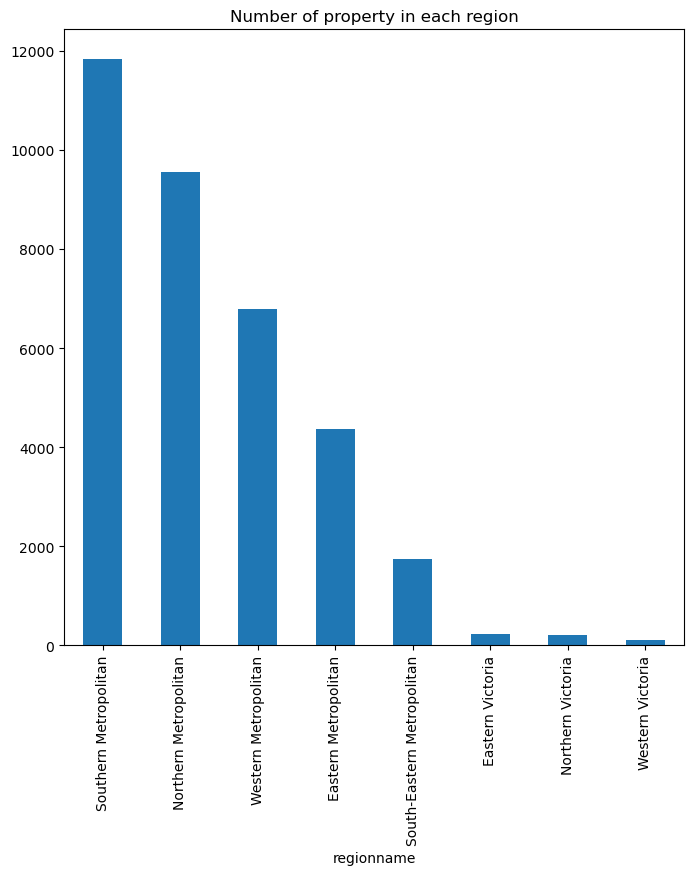

In [26]:
num_property_per_region. sort_values(ascending= False).plot(kind='bar',title='Number of property in each region',figsize=(8,8));

In [27]:
num_property_per_councilarea=melbourne_housing.groupby('councilarea')['propertycount'].count()
num_property_per_councilarea.sort_values(ascending= False)

councilarea
Boroondara City Council           3678
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

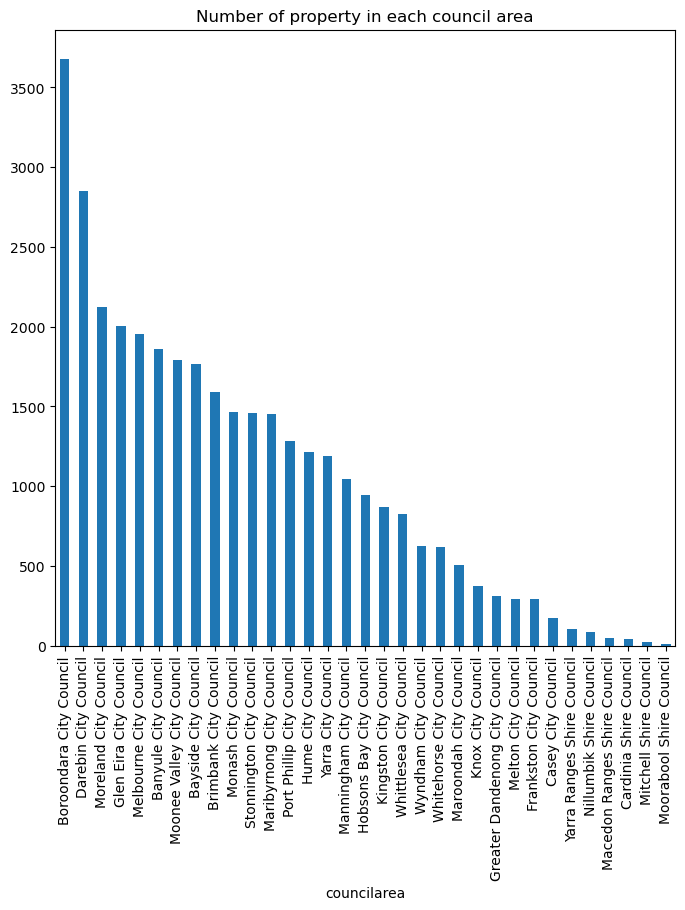

In [28]:
num_property_per_councilarea=melbourne_housing.groupby('councilarea')['propertycount'].count(). sort_values(ascending= False).plot(kind='bar',title='Number of property in each council area',figsize=(8,8));

In [29]:
num_property_per_suburb=melbourne_housing.groupby('suburb')['propertycount'].count()
num_property_per_suburb.head(10).sort_values(ascending= False)

suburb
Altona North      167
Airport West      162
Abbotsford        137
Albert Park       131
Altona            122
Aberfeldie         80
Alphington         79
Albion             71
Altona Meadows     34
Albanvale          14
Name: propertycount, dtype: int64

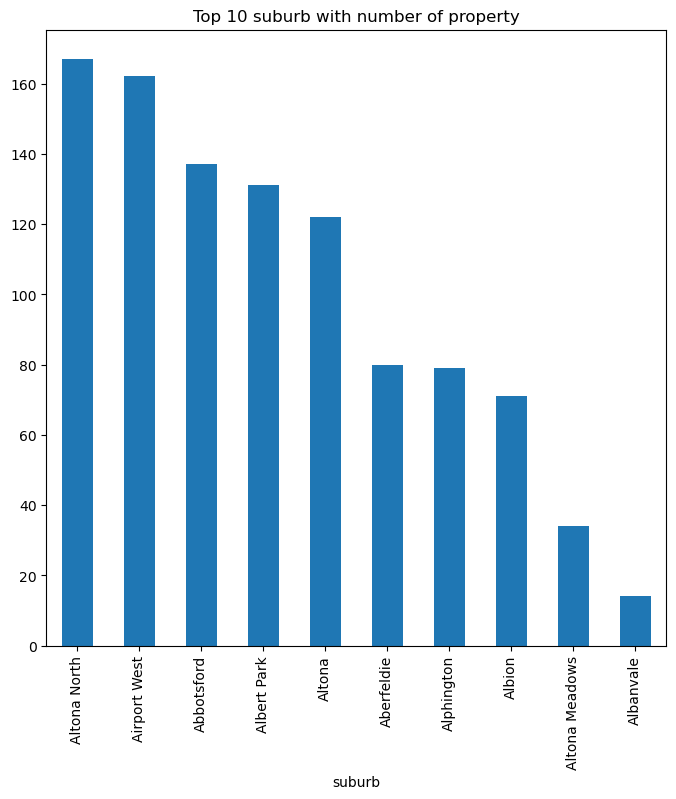

In [30]:
melbourne_housing.groupby('suburb')['propertycount'].count().head(10).sort_values(ascending= False).plot(kind='bar',title='Top 10 suburb with number of property',figsize=(8,8));

from all the above we found:

-No duplicate rows

-No columns with missing values

-No outliers values in Landsize & Building area columns

-Number of regions: 8

-Number of council area: 33

-Number of suburb: 351

-Number of property in each region 

-Number of property in each council area

-Top 10 suburb with number of property

In [31]:
mel_housing = melbourne_housing.drop(['lattitude','longtitude','address','postcode','bedroom2'], axis=1)
mel_housing

suburb  rooms type      price method        sellerg        date  \
0      Abbotsford      2    h   870000.0     SS         Jellis   3/09/2016   
1      Abbotsford      2    h  1480000.0      S         Biggin   3/12/2016   
2      Abbotsford      2    h  1035000.0      S         Biggin   4/02/2016   
3      Abbotsford      3    u   870000.0     VB         Rounds   4/02/2016   
4      Abbotsford      3    h  1465000.0     SP         Biggin   4/03/2017   
...           ...    ...  ...        ...    ...            ...         ...   
34852  Yarraville      4    h  1480000.0     PI            Jas  24/02/2018   
34853  Yarraville      2    h   888000.0     SP        Sweeney  24/02/2018   
34854  Yarraville      2    t   705000.0      S            Jas  24/02/2018   
34855  Yarraville      3    h  1140000.0     SP  hockingstuart  24/02/2018   
34856  Yarraville      2    h  1020000.0     PI             RW  24/02/2018   

       distance  bathroom  car  landsize  buildingarea  yearbuilt  \
0           2.5       1.0  1.0     126.0         136.0     1970.0   
1           2.5       1.0  1.0     202.0         136.0     1970.0   
2           2.5       1.0  0.0     156.0          79.0     1900.0   
3           2.5       2.0  1.0     521.0         136.0     1970.0   
4           2.5       2.0  0.0     134.0         150.0     1900.0   
...         ...       ...  ...       ...           ...        ...   
34852       6.3       1.0  3.0     593.0         136.0     1970.0   
34853       6.3       2.0  1.0      98.0         104.0     2018.0   
34854       6.3       1.0  2.0     220.0         120.0     2000.0   
34855       6.3       2.0  2.0     521.0         136.0     1970.0   
34856       6.3       1.0  0.0     250.0         103.0     1930.0   

                    councilarea             regionname  propertycount  
0            Yarra City Council  Northern Metropolitan         4019.0  
1            Yarra City Council  Northern Metropolitan         4019.0  
2            Yarra City Council  Northern Metropolitan         4019.0  
3            Yarra City Council  Northern Metropolitan         4019.0  
4            Yarra City Council  Northern Metropolitan         4019.0  
...                         ...                    ...            ...  
34852  Maribyrnong City Council   Western Metropolitan         6543.0  
34853  Maribyrnong City Council   Western Metropolitan         6543.0  
34854  Maribyrnong City Council   Western Metropolitan         6543.0  
34855  Maribyrnong City Council   Western Metropolitan         6543.0  
34856  Maribyrnong City Council   Western Metropolitan         6543.0  

[34856 rows x 16 columns]

In [32]:
mel_housing['age'] = 2019 - mel_housing['yearbuilt']

In [33]:
mel_housing['historic'] = np.where(mel_housing['age']>=50,'historic','modern')

In [34]:
mel_housing

suburb  rooms type      price method        sellerg        date  \
0      Abbotsford      2    h   870000.0     SS         Jellis   3/09/2016   
1      Abbotsford      2    h  1480000.0      S         Biggin   3/12/2016   
2      Abbotsford      2    h  1035000.0      S         Biggin   4/02/2016   
3      Abbotsford      3    u   870000.0     VB         Rounds   4/02/2016   
4      Abbotsford      3    h  1465000.0     SP         Biggin   4/03/2017   
...           ...    ...  ...        ...    ...            ...         ...   
34852  Yarraville      4    h  1480000.0     PI            Jas  24/02/2018   
34853  Yarraville      2    h   888000.0     SP        Sweeney  24/02/2018   
34854  Yarraville      2    t   705000.0      S            Jas  24/02/2018   
34855  Yarraville      3    h  1140000.0     SP  hockingstuart  24/02/2018   
34856  Yarraville      2    h  1020000.0     PI             RW  24/02/2018   

       distance  bathroom  car  landsize  buildingarea  yearbuilt  \
0           2.5       1.0  1.0     126.0         136.0     1970.0   
1           2.5       1.0  1.0     202.0         136.0     1970.0   
2           2.5       1.0  0.0     156.0          79.0     1900.0   
3           2.5       2.0  1.0     521.0         136.0     1970.0   
4           2.5       2.0  0.0     134.0         150.0     1900.0   
...         ...       ...  ...       ...           ...        ...   
34852       6.3       1.0  3.0     593.0         136.0     1970.0   
34853       6.3       2.0  1.0      98.0         104.0     2018.0   
34854       6.3       1.0  2.0     220.0         120.0     2000.0   
34855       6.3       2.0  2.0     521.0         136.0     1970.0   
34856       6.3       1.0  0.0     250.0         103.0     1930.0   

                    councilarea             regionname  propertycount    age  \
0            Yarra City Council  Northern Metropolitan         4019.0   49.0   
1            Yarra City Council  Northern Metropolitan         4019.0   49.0   
2            Yarra City Council  Northern Metropolitan         4019.0  119.0   
3            Yarra City Council  Northern Metropolitan         4019.0   49.0   
4            Yarra City Council  Northern Metropolitan         4019.0  119.0   
...                         ...                    ...            ...    ...   
34852  Maribyrnong City Council   Western Metropolitan         6543.0   49.0   
34853  Maribyrnong City Council   Western Metropolitan         6543.0    1.0   
34854  Maribyrnong City Council   Western Metropolitan         6543.0   19.0   
34855  Maribyrnong City Council   Western Metropolitan         6543.0   49.0   
34856  Maribyrnong City Council   Western Metropolitan         6543.0   89.0   

       historic  
0        modern  
1        modern  
2      historic  
3        modern  
4      historic  
...         ...  
34852    modern  
34853    modern  
34854    modern  
34855    modern  
34856  historic  

[34856 rows x 18 columns]

In [35]:
mel_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34856 non-null  object 
 1   rooms          34856 non-null  int64  
 2   type           34856 non-null  object 
 3   price          34856 non-null  float64
 4   method         34856 non-null  object 
 5   sellerg        34856 non-null  object 
 6   date           34856 non-null  object 
 7   distance       34856 non-null  float64
 8   bathroom       34856 non-null  float64
 9   car            34856 non-null  float64
 10  landsize       34856 non-null  float64
 11  buildingarea   34856 non-null  float64
 12  yearbuilt      34856 non-null  float64
 13  councilarea    34856 non-null  object 
 14  regionname     34856 non-null  object 
 15  propertycount  34856 non-null  float64
 16  age            34856 non-null  float64
 17  historic       34856 non-null  object 
dtypes: flo

In [36]:
mel_housing['age']= mel_housing['age'].astype('int64')
mel_housing['age'].dtype

dtype('int64')

In [37]:
mel_housing['price']= mel_housing['price'].astype('int64')
mel_housing['price'].dtype

dtype('int64')

In [38]:
mel_housing['car']= mel_housing['car'].astype('int64')
mel_housing['car'].dtype

dtype('int64')

In [39]:
mel_housing['bathroom']= mel_housing['bathroom'].astype('int64')
mel_housing['bathroom'].dtype

dtype('int64')

In [40]:
mel_housing['yearbuilt']= mel_housing['yearbuilt'].astype('int64')
mel_housing['yearbuilt'].dtype

dtype('int64')

In [41]:
mel_housing['propertycount']= mel_housing['propertycount'].astype('int64')
mel_housing['propertycount'].dtype

dtype('int64')

In [42]:
mel_housing['distance']= mel_housing['distance'].astype('int')
mel_housing['distance'].dtype

dtype('int32')

In [43]:
mel_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34856 non-null  object 
 1   rooms          34856 non-null  int64  
 2   type           34856 non-null  object 
 3   price          34856 non-null  int64  
 4   method         34856 non-null  object 
 5   sellerg        34856 non-null  object 
 6   date           34856 non-null  object 
 7   distance       34856 non-null  int32  
 8   bathroom       34856 non-null  int64  
 9   car            34856 non-null  int64  
 10  landsize       34856 non-null  float64
 11  buildingarea   34856 non-null  float64
 12  yearbuilt      34856 non-null  int64  
 13  councilarea    34856 non-null  object 
 14  regionname     34856 non-null  object 
 15  propertycount  34856 non-null  int64  
 16  age            34856 non-null  int64  
 17  historic       34856 non-null  object 
dtypes: flo

In [44]:
mel_housing['building_to_land_ratio']= mel_housing['buildingarea']/mel_housing['landsize']
mel_housing

suburb  rooms type    price method        sellerg        date  \
0      Abbotsford      2    h   870000     SS         Jellis   3/09/2016   
1      Abbotsford      2    h  1480000      S         Biggin   3/12/2016   
2      Abbotsford      2    h  1035000      S         Biggin   4/02/2016   
3      Abbotsford      3    u   870000     VB         Rounds   4/02/2016   
4      Abbotsford      3    h  1465000     SP         Biggin   4/03/2017   
...           ...    ...  ...      ...    ...            ...         ...   
34852  Yarraville      4    h  1480000     PI            Jas  24/02/2018   
34853  Yarraville      2    h   888000     SP        Sweeney  24/02/2018   
34854  Yarraville      2    t   705000      S            Jas  24/02/2018   
34855  Yarraville      3    h  1140000     SP  hockingstuart  24/02/2018   
34856  Yarraville      2    h  1020000     PI             RW  24/02/2018   

       distance  bathroom  car  landsize  buildingarea  yearbuilt  \
0             2         1    1     126.0         136.0       1970   
1             2         1    1     202.0         136.0       1970   
2             2         1    0     156.0          79.0       1900   
3             2         2    1     521.0         136.0       1970   
4             2         2    0     134.0         150.0       1900   
...         ...       ...  ...       ...           ...        ...   
34852         6         1    3     593.0         136.0       1970   
34853         6         2    1      98.0         104.0       2018   
34854         6         1    2     220.0         120.0       2000   
34855         6         2    2     521.0         136.0       1970   
34856         6         1    0     250.0         103.0       1930   

                    councilarea             regionname  propertycount  age  \
0            Yarra City Council  Northern Metropolitan           4019   49   
1            Yarra City Council  Northern Metropolitan           4019   49   
2            Yarra City Council  Northern Metropolitan           4019  119   
3            Yarra City Council  Northern Metropolitan           4019   49   
4            Yarra City Council  Northern Metropolitan           4019  119   
...                         ...                    ...            ...  ...   
34852  Maribyrnong City Council   Western Metropolitan           6543   49   
34853  Maribyrnong City Council   Western Metropolitan           6543    1   
34854  Maribyrnong City Council   Western Metropolitan           6543   19   
34855  Maribyrnong City Council   Western Metropolitan           6543   49   
34856  Maribyrnong City Council   Western Metropolitan           6543   89   

       historic  building_to_land_ratio  
0        modern                1.079365  
1        modern                0.673267  
2      historic                0.506410  
3        modern                0.261036  
4      historic                1.119403  
...         ...                     ...  
34852    modern                0.229342  
34853    modern                1.061224  
34854    modern                0.545455  
34855    modern                0.261036  
34856  historic                0.412000  

[34856 rows x 19 columns]

In [45]:
mel_housing['building_to_land_ratio']= mel_housing['building_to_land_ratio'].astype('float64')
mel_housing['building_to_land_ratio'].dtype

dtype('float64')

In [60]:
mel_housing.describe().transpose()


count          mean            std           min  \
rooms                   34856.0  3.031013e+00       0.969947      1.000000   
price                   34856.0  1.010842e+06  572006.858531  85000.000000   
distance                34856.0  1.074547e+01       6.792673      0.000000   
bathroom                34856.0  1.713306e+00       0.652727      0.000000   
car                     34856.0  1.796735e+00       0.882981      0.000000   
landsize                34856.0  6.056239e+02    2759.614246     27.000000   
buildingarea            34856.0  1.462700e+02     252.012458     21.000000   
yearbuilt               34856.0  1.967898e+03      25.041817   1196.000000   
propertycount           34856.0  7.572893e+03    4427.947745     83.000000   
age                     34856.0  5.110228e+01      25.041817    -87.000000   
building_to_land_ratio  34856.0  3.364816e-01       0.265877      0.000314   

                                  25%            50%           75%  \
rooms                        2.000000       3.000000  4.000000e+00   
price                   695000.000000  870000.000000  1.150000e+06   
distance                     6.000000      10.000000  1.400000e+01   
bathroom                     1.000000       2.000000  2.000000e+00   
car                          1.000000       2.000000  2.000000e+00   
landsize                   501.000000     521.000000  5.980000e+02   
buildingarea               136.000000     136.000000  1.360000e+02   
yearbuilt                 1970.000000    1970.000000  1.970000e+03   
propertycount             4385.000000    6763.000000  1.041200e+04   
age                         49.000000      49.000000  4.900000e+01   
building_to_land_ratio       0.225539       0.261036  3.474484e-01   

                                 max  
rooms                   1.600000e+01  
price                   1.120000e+07  
distance                4.800000e+01  
bathroom                1.200000e+01  
car                     2.600000e+01  
landsize                4.330140e+05  
buildingarea            4.451500e+04  
yearbuilt               2.106000e+03  
propertycount           2.165000e+04  
age                     8.230000e+02  
building_to_land_ratio  9.277322e+00

In [61]:
### Fixing the age column outliers
mel_housing = mel_housing[mel_housing['age']<800]

In [62]:
mel_housing = mel_housing[mel_housing['age']>=0]

In [63]:
mel_housing.describe().transpose()


count          mean            std           min  \
rooms                   34854.0  3.030986e+00       0.969961      1.000000   
price                   34854.0  1.010840e+06  572021.875431  85000.000000   
distance                34854.0  1.074537e+01       6.792845      0.000000   
bathroom                34854.0  1.713318e+00       0.652733      0.000000   
car                     34854.0  1.796666e+00       0.882926      0.000000   
landsize                34854.0  6.056146e+02    2759.693133     27.000000   
buildingarea            34854.0  1.462677e+02     252.018967     21.000000   
yearbuilt               34854.0  1.967916e+03      24.687763   1800.000000   
propertycount           34854.0  7.572816e+03    4427.935068     83.000000   
age                     34854.0  5.108409e+01      24.687763      0.000000   
building_to_land_ratio  34854.0  3.364867e-01       0.265882      0.000314   

                                  25%            50%           75%  \
rooms                        2.000000       3.000000  4.000000e+00   
price                   695000.000000  870000.000000  1.150000e+06   
distance                     6.000000      10.000000  1.400000e+01   
bathroom                     1.000000       2.000000  2.000000e+00   
car                          1.000000       2.000000  2.000000e+00   
landsize                   501.000000     521.000000  5.980000e+02   
buildingarea               136.000000     136.000000  1.360000e+02   
yearbuilt                 1970.000000    1970.000000  1.970000e+03   
propertycount             4385.000000    6763.000000  1.041200e+04   
age                         49.000000      49.000000  4.900000e+01   
building_to_land_ratio       0.225539       0.261036  3.474088e-01   

                                 max  
rooms                   1.600000e+01  
price                   1.120000e+07  
distance                4.800000e+01  
bathroom                1.200000e+01  
car                     2.600000e+01  
landsize                4.330140e+05  
buildingarea            4.451500e+04  
yearbuilt               2.019000e+03  
propertycount           2.165000e+04  
age                     2.190000e+02  
building_to_land_ratio  9.277322e+00

In [64]:
mel_housing['age'].max()

219

# Exploratory Data Analysis

## 1)What are the top 10 suburbs with the highest number of sold properties?

In [46]:
mel_housing.groupby(by=['suburb'])['method']
def count_suburub_sales(series):
    return (series == 'S').sum()


In [47]:
sold_properties = mel_housing.groupby(by=['suburb'])['method'].apply(count_suburub_sales).reset_index(name='count_suburub_sales')
sold_properties.sort_values(by=['count_suburub_sales'],ascending=False).nlargest(10,'count_suburub_sales')


suburb  count_suburub_sales
265       Reservoir                  510
32   Bentleigh East                  369
266        Richmond                  327
150       Glen Iris                  306
188             Kew                  281
262         Preston                  275
162        Hawthorn                  264
127        Essendon                  253
288     South Yarra                  245
44         Brighton                  244

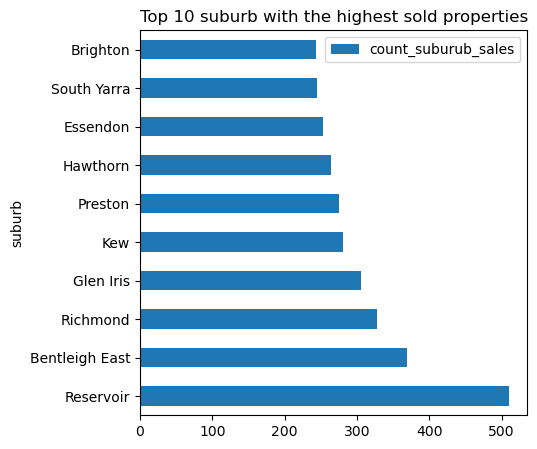

In [48]:
sold_properties.sort_values(by=['count_suburub_sales'],ascending=False).nlargest(10,'count_suburub_sales').plot( x='suburb',kind='barh',
                                                                  title='Top 10 suburb with the highest sold properties',figsize=(5,5));


### The figure shows the top 10 suburbs in Melbourne based on the count of property sales. Reservoir has the highest count with 510 sales, followed by Bentleigh East and Richmond with 369 and 327 sales respectively. This information may indicate that these suburbs have high demand and are popular among buyers.

## 2) Which are the top 10 suburbs with the highest average property prices?

In [227]:
avg_price_per_suburb=mel_housing.groupby('suburb')['price'].median().sort_values()
avg_price_per_suburb=avg_price_per_suburb.astype(int)

In [241]:
avg_price_per_suburb.nlargest(10).reset_index()

suburb    price
0  Ivanhoe East  1601000
1  Princes Hill  1530000
2     Beaumaris  1515000
3   Albert Park  1515000
4   Middle Park  1500000
5  Balwyn North  1485000
6      Kew East  1451000
7     Ashburton  1425000
8       Hampton  1325000
9    Canterbury  1305000

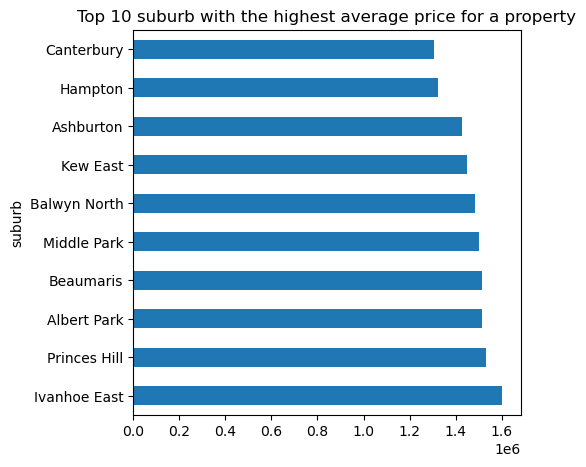

In [230]:
avg_price_per_suburb.sort_values(ascending=False).nlargest(10).plot( x='suburb',y='average price ',kind='barh',
                                                                  title='Top 10 suburb with the highest average price for a property',figsize=(5,5));


 ### The figure shows the top 10 suburbs in Melbourne based on the median price of property sales. Ivanhoe East has the highest median price at 1,601,000 AUD dollar, followed by Princes Hill and Beaumaris at 1,530,000 AUD dollar and 1,515,000 AUD dollar respectively. 

## 3) How do the prices and sales of modern properties compare to those of historic properties?

## Price

In [52]:
price_per_historic=mel_housing.groupby('historic')['price'].mean().sort_values()
price_per_historic=price_per_historic.astype(int)

In [53]:
price_per_historic.sort_values(ascending=False).reset_index()

historic    price
0  historic  1189933
1    modern   964616

In [244]:
price_historic_vs_modern=px.bar(mel_housing.groupby('historic')['price'].mean().sort_values(),color_discrete_sequence=['red'], title='Average price per historic')
price_historic_vs_modern.update_xaxes(title_text='historic')
price_historic_vs_modern.update_yaxes(title_text='price')
price_historic_vs_modern.show()

In [245]:
px.box(mel_housing, x="historic", y="price", color_discrete_sequence=['darkblue'],title='Average price per historic')

## Sales

In [55]:
mel_housing.groupby(by=['historic'])['method']
def historic_sales(series):
    return (series == 'S').sum()
sales_historic_vs_modern=mel_housing.groupby(by=['historic'])['method'].apply(historic_sales).reset_index(name='historic_sales')
sales_historic_vs_modern.sort_values(by=['historic_sales'],ascending=False)

historic  historic_sales
1    modern           15655
0  historic            4089

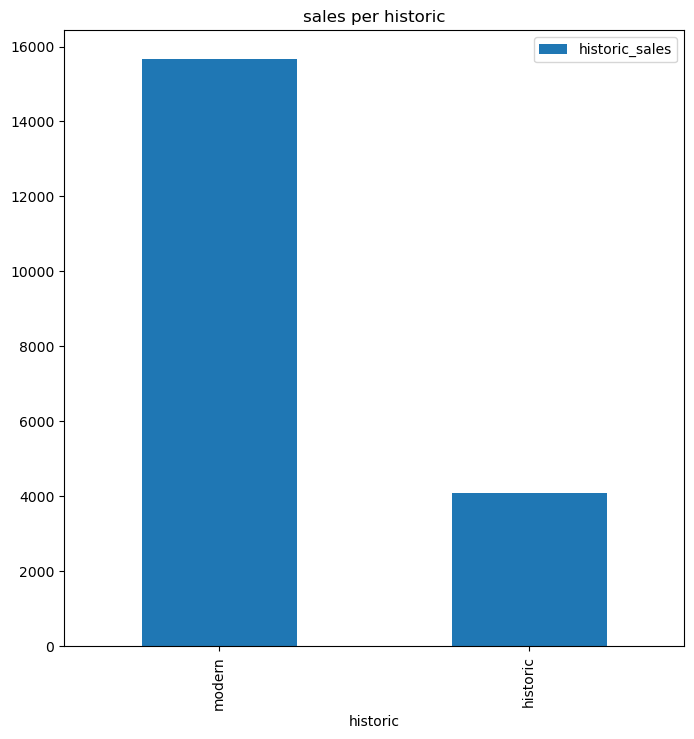

In [56]:
sales_historic_vs_modern.sort_values(by=['historic_sales'],ascending=False).plot(x ='historic',kind='bar',title='sales per historic',figsize=(8,8));


### According to the above data and figures, historic properties have an average price of  1,189,933 AUD which is higher than the average price of modern properties which is 964,616 AUD.

### On the other hand, modern properties have higher sales count compared to historic properties, as the data shows that there were 15,655 sales of modern properties, while only 4,089 sales of historic properties. 

### In conclusion, while historic properties may have a higher price on average, modern properties are more popular in terms of sales count.

## 4) How does the age of a property affect its price and sales compared to modern and historic properties?

## Price

In [262]:
price_per_age=mel_housing.groupby('age')['price'].median().nlargest(20)
price_per_age=price_per_age.astype(int)

In [263]:
price_per_age.sort_values(ascending=False).reset_index()

age    price
0   135  5046000
1   126  3335000
2   157  3200000
3   118  3187500
4   116  3010000
5    77  2900000
6   151  2720000
7   130  2605000
8   122  2600000
9   156  2525000
10  163  2260000
11  117  2250000
12  132  2200000
13  165  2090000
14  112  1907500
15  142  1840000
16  138  1830000
17  125  1755000
18  105  1732500
19   92  1600000

In [260]:
price_per_age_fig=px.scatter(mel_housing,x='age',y='price')
price_per_age_fig.show()

### Sales 

In [261]:
mel_housing.groupby(by=['age'])['method']
def age_sales(series):
    return (series == 'S').sum()
sales_age=mel_housing.groupby(by=['age'])['method'].apply(age_sales).reset_index(name='age_sales')
sales_age.sort_values(by=['age_sales'],ascending=False).head(20)

age  age_sales
49    49      11863
59    59        710
69    69        603
39    39        422
118  119        360
19    19        334
98    99        314
88    89        297
108  109        269
128  129        268
44    44        243
29    29        215
78    79        213
9      9        191
7      7        162
54    54        151
34    34        144
24    24        134
14    14        127
6      6        121

In [58]:
sales_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        160 non-null    int64
 1   age_sales  160 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


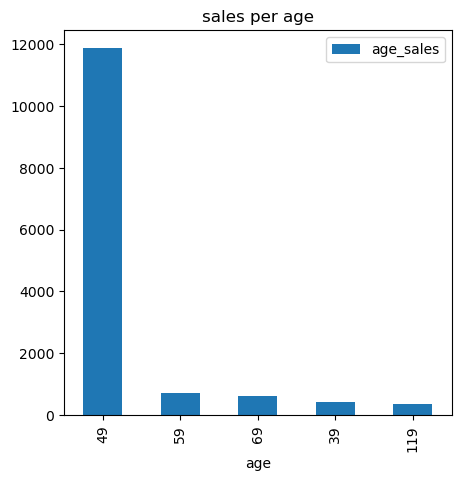

In [59]:
sales_age.sort_values(by=['age_sales'],ascending=False).head(5).plot(x ='age',kind='bar',title='sales per age',figsize=(5,5));


### According to the data, the most sales count is for properties with an age of 49 years, with a sales count of 11863. Interestingly, there is a notable drop in sales count for properties with an age of 59, 69, and 39 years, with sales counts of 710, 603, and 422, respectively. It's worth noting that the data also includes properties with ages of 118, 98, and 128 years, with sales counts of 360, 314, and 268, respectively. These outliers suggest that there might be some misunderstanding if we rely on analyzing the sales per Historic or Modern properties,based on that the most sales count for properties are in a middle period of time which we can name it as mid-century properties.

### NOTE: The mid-century properties can be defined as properties with ages ranging from 30 to 80 years.

## 5) Is there a correlation between the price and sales of a property regarding different regions?

## Price

In [269]:
price_per_region=mel_housing.groupby('regionname').median()['price']
price_per_region = price_per_region.astype(int)

In [270]:
price_per_region.sort_values(ascending=False).reset_index()

regionname   price
0        Eastern Metropolitan  870000
1  South-Eastern Metropolitan  870000
2       Southern Metropolitan  870000
3       Northern Metropolitan  850000
4        Western Metropolitan  817000
5            Eastern Victoria  770000
6           Northern Victoria  616000
7            Western Victoria  420000

In [272]:
price_per_region_fig=px.bar(mel_housing.groupby('regionname')['price'].median().sort_values(),color_discrete_sequence=['green'], title='price per region')
price_per_region_fig.update_xaxes(title_text='regionname')
price_per_region_fig.update_yaxes(title_text='price')
price_per_region_fig.show()

### Sales

In [72]:
mel_housing.groupby(by=['regionname'])['method']
def count_sales(series):
    return (series == 'S').sum()
sales_per_region=mel_housing.groupby(by=['regionname'])['method'].apply(count_sales).reset_index(name='count_sales')
sales_per_region.sort_values(by=['count_sales'],ascending=False)

regionname  count_sales
5       Southern Metropolitan         6700
2       Northern Metropolitan         5695
6        Western Metropolitan         3753
0        Eastern Metropolitan         2338
4  South-Eastern Metropolitan          980
3           Northern Victoria          110
1            Eastern Victoria           99
7            Western Victoria           69

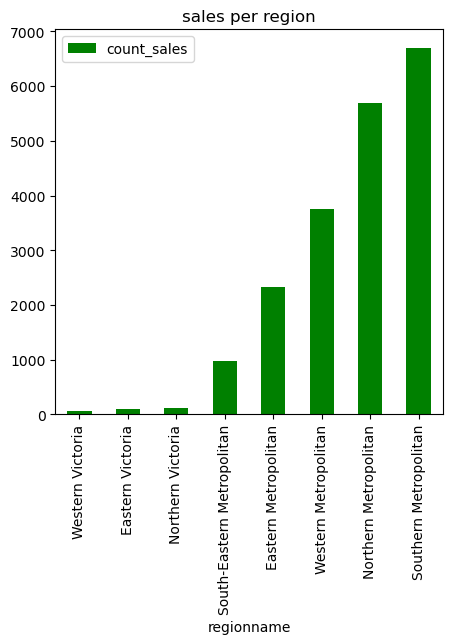

In [80]:
sales_per_region.sort_values(by=['count_sales'],ascending=True).plot(x ='regionname',kind='bar',title='sales per region',color='green',figsize=(5,5));


In [309]:
# sort sales_per_region by median price
price_per_region = mel_housing.groupby('regionname')['price'].median()
sales_per_region = sales_per_region.set_index('regionname')
sales_per_region = sales_per_region.loc[price_per_region.index].reset_index()
sales_per_region = sales_per_region.sort_values(by='count_sales', ascending=True)

# creating two plots
price_per_region_fig = px.bar(price_per_region.sort_values(),
                              color_discrete_sequence=['green'],
                              title='price per region')
price_per_region_fig.update_xaxes(title_text='regionname')
price_per_region_fig.update_yaxes(title_text='price')

sales_per_region_fig = go.Figure()
sales_per_region_fig.add_trace(
    go.Bar(x=sales_per_region['regionname'],
           y=sales_per_region['count_sales'],
           marker_color='green',
           name='count_sales'))
sales_per_region_fig.update_layout(title='sales count per region')

fig = make_subplots(rows=1, cols=2)

fig.add_trace(price_per_region_fig.data[0], row=1, col=1)
fig.add_trace(sales_per_region_fig.data[0], row=1, col=2)

fig.update_layout(title='Price and Sales count per Region', showlegend=False)

fig.show()






### According to the analysis above,this charts show the average price of properties per region and the properties sales count per region.

### It is interesting to note that the two charts have the same order of regions from the highest average price/sales count to the lowest, indicating a positive correlation between the two factors.

## 6) Where should I  buy a 2 bedroom unit?

In [274]:

# select only the rows with 2 bedrooms
two_bed_units = mel_housing[mel_housing['rooms'] == 2]

# calculate the average price per region
price_per_region = two_bed_units.groupby('regionname')['price'].median().sort_values()
price_per_region=price_per_region.astype(int)

price_per_region.nlargest(10)

regionname
Southern Metropolitan         828500
Northern Metropolitan         750000
Eastern Metropolitan          725000
Western Metropolitan          650000
South-Eastern Metropolitan    641000
Northern Victoria             609500
Eastern Victoria              528500
Western Victoria              300000
Name: price, dtype: int32

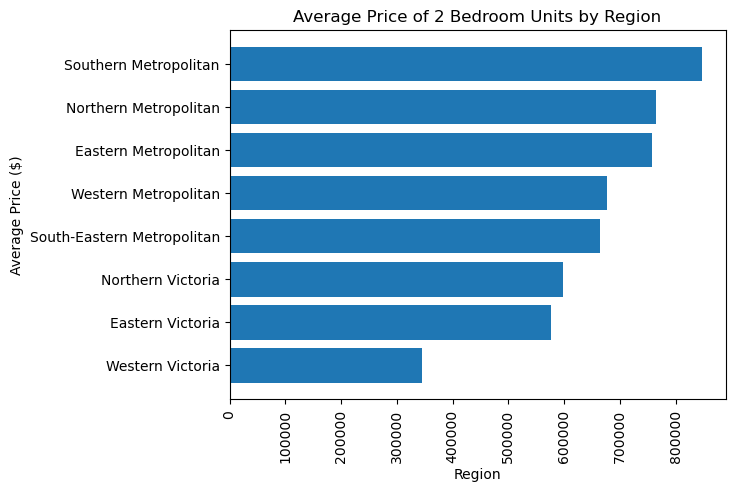

In [266]:
# plot the average price per region
plt.barh(price_per_region.index, price_per_region.values)
plt.title('Average Price of 2 Bedroom Units by Region')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

### As we can see through this chart that the regions with the highest average price of properties with 2 bedrooms are Southern Metropolitan and Eastern Metropolitan, which also have the highest average price of properties in the previous chart. This suggests that the higher average price of properties in these regions may be influenced by the higher average price of 2-bedroom properties. 

### Thus, we can assume that their is a positive correlation between the average price, the count of sales ,and the 2 bedrooms properties regarding regions.

## 7) Is there a relationship between property prices and            sales and their distance from the city center?

### Price

In [296]:
price_per_distance=px.scatter(mel_housing,x='distance',y='price')
price_per_distance.show()

In [300]:
highest_prices_per_distance=mel_housing.groupby('distance')['price'].mean().nlargest(10)
highest_prices_per_distance.astype(int)

distance
7     1205713
3     1192385
9     1186301
10    1131554
5     1122824
4     1067830
1     1053857
11    1029006
13    1018455
2     1013266
Name: price, dtype: int32

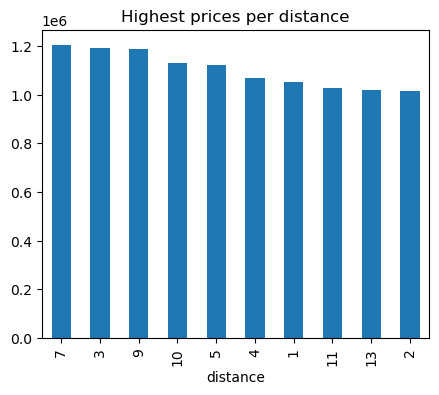

In [298]:
highest_prices_per_distance.plot(x ='distance',kind='bar',title='Highest prices per distance',figsize=(5,4));

### Sales

In [104]:
mel_housing.groupby(by=['distance'])['method']
def distance_sales(series):
    return (series == 'S').sum()
highest_sales_per_distance=mel_housing.groupby(by=['distance'])['method'].apply(distance_sales).reset_index(name='distance_sales')
highest_sales_per_distance.sort_values(by=['distance_sales'],ascending=False).head(10)

distance  distance_sales
11        11            1688
7          7            1503
13        13            1491
5          5            1396
8          8            1288
10        10            1193
6          6            1138
14        14            1113
12        12            1044
9          9            1039

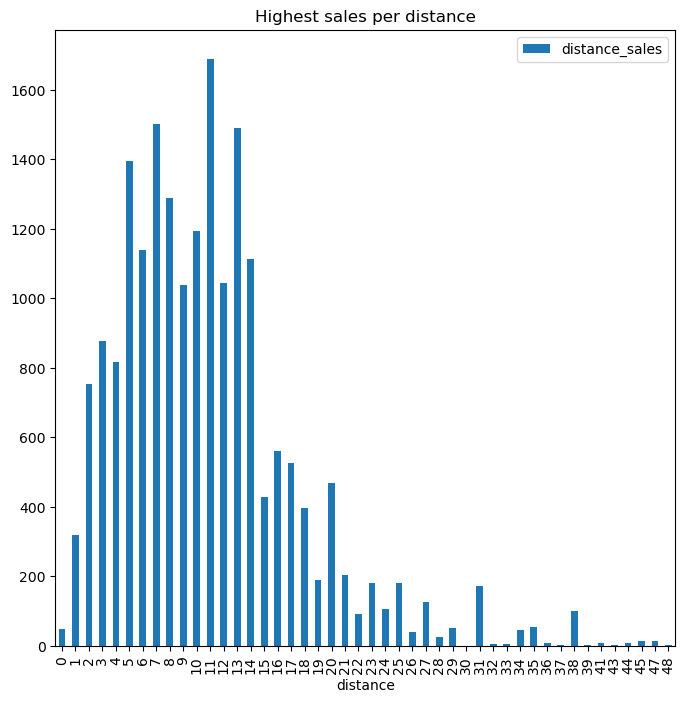

In [303]:
highest_sales_per_distance.plot(x ='distance',kind='bar',title='Highest sales per distance',figsize=(8,8));


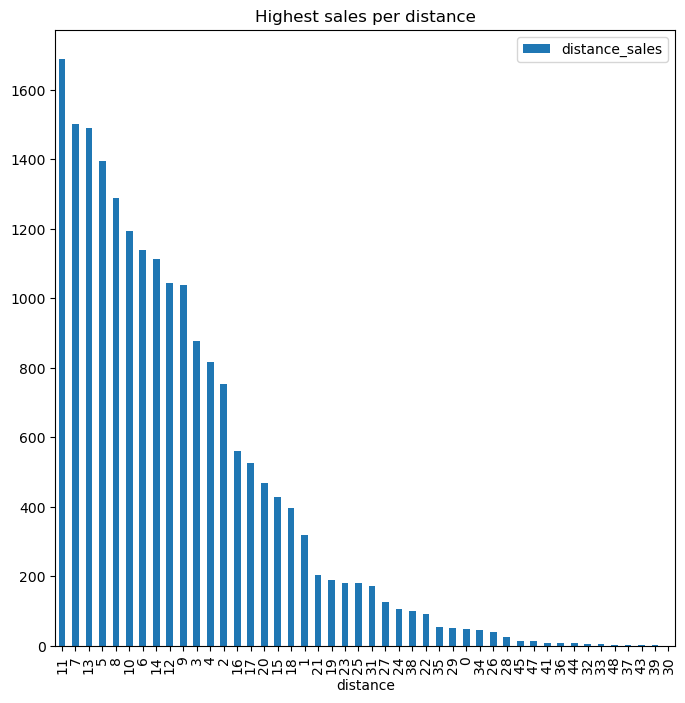

In [306]:
highest_sales_per_distance.sort_values(by=['distance_sales'],ascending=False).plot(x ='distance',kind='bar',title='Highest sales per distance',figsize=(8,8));


### The analysis of the first two charts, namely the price per distance and the sales per distance, indicates a clear trend. The data shows that properties closer to the city center of Melbourne command higher prices and have a greater number of sales. This relationship is indicative of a positive correlation between property prices and sales.

### As such, it can be inferred that the closer a property is to the city center, the more likely it is to have a higher price and sales count.

### It can be clearly seen on the 2nd charts too, there are several common values in both tables, specifically for distances 5, 7, 9, 10, and 11. These distances have both high property prices and high sales count, indicating a strong demand for properties in these areas.

### It's worth noting that these distances are relatively close to the city center of Melbourne, with the farthest being distance 11 at around 15 km away. This suggests that properties located in close proximity to the city center tend to have higher prices and sales count, likely due to their accessibility and proximity to various amenities and job opportunities.

### Overall, the data from both tables suggest that properties located closer to the city center of Melbourne tend to have higher prices and sales count, highlighting the importance of location in the real estate market

## 8) How do the different regions compare in terms of their distance from the city center and property prices and sales?

In [107]:
region_per_distance=mel_housing.groupby('regionname').mean()['distance']
region_per_distance.sort_values(ascending=True).reset_index()

regionname   distance
0       Southern Metropolitan   8.348931
1       Northern Metropolitan   8.707753
2        Western Metropolitan  10.502574
3        Eastern Metropolitan  14.148605
4  South-Eastern Metropolitan  23.774008
5            Western Victoria  30.165217
6           Northern Victoria  32.911330
7            Eastern Victoria  33.640351

In [140]:
region_per_distance_fig=px.bar(mel_housing.groupby('regionname').mean()['distance'].sort_values(ascending=True),color_discrete_sequence=['green'], width= 500, height=500)
region_per_distance_fig.update_xaxes(title_text='regionname')
region_per_distance_fig.update_yaxes(title_text='distance')
region_per_distance_fig.show()

### The chart indicates that the metropolitan regions, which are closer to the city center, have the highest rates in price, sales, and sales of properties with 2 bedrooms, in line with our previous discussion.

## 9) Is there a correlation between the distance of a property from the city center and its building to land ratio?

In [114]:
building_land_ratio_to_distance=px.scatter(mel_housing,x='distance',y='building_to_land_ratio')
building_land_ratio_to_distance.show()

In [308]:
region_per_building_to_land_ratio_fig=px.bar(mel_housing.groupby('regionname').mean()['building_to_land_ratio'].sort_values(ascending=False),color_discrete_sequence=['green'],width= 800, height=500)
region_per_building_to_land_ratio_fig.update_xaxes(title_text='building_to_land_ratio')
region_per_building_to_land_ratio_fig.update_yaxes(title_text='regionname')
region_per_building_to_land_ratio_fig.show()

### Based on the figure presented, there is a positive correlation between the building to land ratio and the price of the properties as we move closer to the city center. On the other hand, there is a negative correlation between the distance from the center and both the building to land ratio and the price of the properties. This suggests that the buildings in closer proximity to the city center tend to have a higher building to land ratio, which could contribute to the higher prices of properties in those areas.

## 10) How does the number of units of each housing type affect their prices, and what is the quantity and ratio of each type of unit in the area?

In [144]:
mel_housing['type'] = mel_housing['type'].map({'h':'houses',
                                            't':'townhouse', 
                                            'u':'units'})

### Type Count 

In [149]:
types_count=mel_housing['type'].value_counts()#.plot(kind='bar');
types_count

houses       23978
units         7297
townhouse     3579
Name: type, dtype: int64

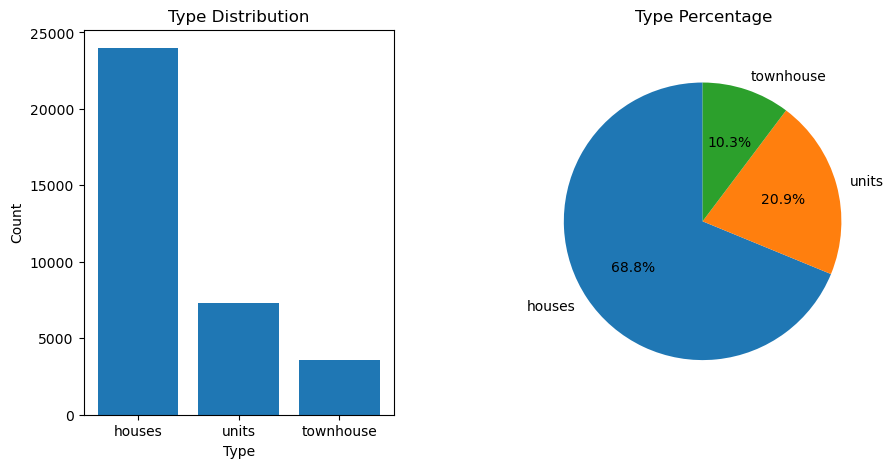

In [175]:
### Showing the types count distribution :

# Create a grid of subplots with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Ploting the bar chart in the first subplot
axs[0].bar(mel_housing['type'].value_counts().index, mel_housing['type'].value_counts().values)
axs[0].set_title('Type Distribution')
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Count')

# Ploting the pie chart in the second subplot
axs[1].pie(mel_housing['type'].value_counts(normalize=True).values
           ,labels=mel_housing['type'].value_counts(normalize=True).index,
           autopct='%1.1f%%', startangle=90)
axs[1].set_title('Type Percentage')
axs[1].axis('equal')

plt.subplots_adjust(wspace=0.5)


plt.show()

### Average Price Per Type

In [176]:
avg_price_per_type=mel_housing.groupby('type')['price'].mean()
avg_price_per_type=price_per_type.astype(int)

In [178]:
avg_price_per_type.sort_values(ascending=False).reset_index()

type    price
0     houses  1127073
1  townhouse   918909
2      units   673986

In [174]:
avg_price_per_type_fig = px.bar(avg_price_per_type, x=avg_price_per_type.index, y='price', 
             color='price', color_continuous_scale='greens')

avg_price_per_type_fig.update_layout(title='Average Price per Housing Type',
                  xaxis_title='Type',
                  yaxis_title='Average Price',
                  plot_bgcolor='rgb(40, 40, 40)',
                  paper_bgcolor='rgb(40, 40, 40)',
                  font_color='white')

avg_price_per_type_fig.show()

### The first figure shows the count of each property type, with houses being the most common at 68.4%, followed by units at 20.9% and townhouses at 10.2%. 

### On the other hand, the second figure displays the average price of each property type, with houses having the highest average price at 1,127,073 AUD, followed by townhouses at 918,909 AUD and units at 673,986 AUD.

### From this data, we can infer that houses are the most expensive property type, while also being the most common. Conversely, units are the least expensive type, but still have a relatively high count compared to townhouses. 

### Overall, the data suggests a possible demand for affordable housing options in the area.

## 11) What is the correlation between the number of rooms in a property and its sales count and price?

In [199]:
price_per_rooms=mel_housing.groupby('rooms')['price'].median()
price_per_rooms=price_per_rooms.astype(int)
price_per_rooms.sort_values(ascending=False)

rooms
16    5000000
10    2037500
5     1100000
6     1085000
7     1002500
4      925000
8      910000
3      870000
9      870000
12     870000
2      753000
1      420000
Name: price, dtype: int32

In [191]:
price_per_rooms.sort_values(ascending=False).reset_index()

rooms    price
0      16  5000000
1      10  2037500
2       5  1100000
3       6  1085000
4       7  1002500
5       4   925000
6       8   910000
7       3   870000
8       9   870000
9      12   870000
10      2   753000
11      1   420000

In [202]:
mel_housing.groupby(by=['rooms'])['method']
def rooms_sales(series):
    return (series == 'S').sum()
sales_rooms=mel_housing.groupby(by=['rooms'])['method'].apply(historic_sales).reset_index(name='rooms_sales')
sales_rooms.sort_values(by=['rooms_sales'],ascending=False)

rooms  rooms_sales
2       3         9028
1       2         4783
3       4         4339
4       5          824
0       1          650
5       6           89
6       7           14
7       8           10
9      10            3
8       9            2
10     12            1
11     16            1

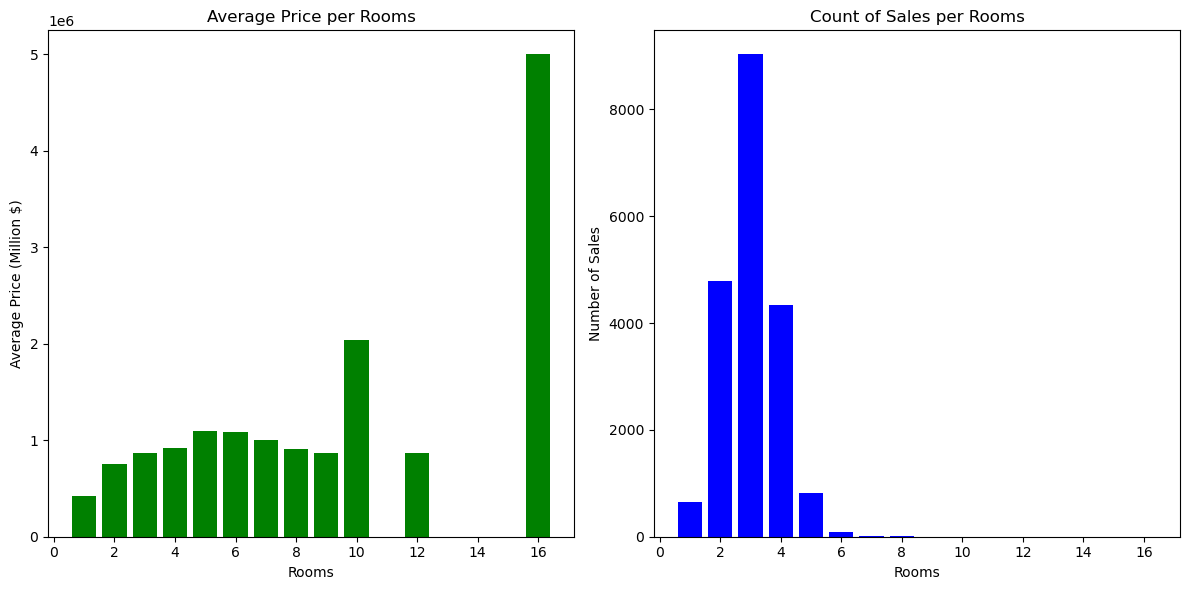

In [223]:
# First plot - Average Price per Rooms
price_per_rooms = mel_housing.groupby('rooms')['price'].median()
sorted_price_per_rooms = price_per_rooms.sort_values(ascending=False).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(sorted_price_per_rooms['rooms'], sorted_price_per_rooms['price'].values, color='green')
axs[0].set_title('Average Price per Rooms')
axs[0].set_xlabel('Rooms')
axs[0].set_ylabel('Average Price (Million $)')

# Second plot - Count of Sales per Rooms
def rooms_sales(series):
    return (series == 'S').sum()

sales_rooms = mel_housing.groupby(by=['rooms'])['method'].apply(rooms_sales).reset_index(name='rooms_sales')
sorted_sales_rooms = sales_rooms.sort_values(by=['rooms_sales'], ascending=False)

axs[1].bar(sorted_sales_rooms['rooms'], sorted_sales_rooms['rooms_sales'], color='blue')
axs[1].set_title('Count of Sales per Rooms')
axs[1].set_xlabel('Rooms')
axs[1].set_ylabel('Number of Sales')

plt.tight_layout()
plt.show()

### The two charts show the relationship between the number of rooms in properties and their average price and sales count. The first chart displays the average price per room, with the x-axis representing the number of rooms and the y-axis representing the average Price. The second chart shows the count of sales per room, with the x-axis also representing the number of rooms and the y-axis representing the number of sales.

### Analysis of the charts reveals that the properties with 2, 3, and 4 rooms have the highest sales count, indicating that these types of properties are more in demand. In contrast, the average price per room is not the cheapest for these types of properties, but they still command some of the best average prices on the chart.

### Overall, the charts suggest that the number of rooms is an important factor in determining the sales count and price of properties, with properties with 2-4 rooms being the most popular and commanding some of the best average prices.Especially the properties with 3 rooms, having the highest count of sales.


# Conclusion

### After analyzing the Melbourne housing dataset, we can see that the top 10 suburbs with the highest number of sold properties are mainly located in the central and eastern parts of Melbourne. Additionally, the top 10 suburbs with the highest average property prices are mostly located in the eastern and southeastern parts of Melbourne.

### Furthermore, we observed that there is a positive correlation between the number of rooms in a property and its sales count and price. In terms of property age, the sales count and price of modern properties appear to be higher than those of historic properties, However, the highest price and sales count comes in the mid-century property age. Additionally, the distance of a property from the city center has a significant impact on its price and sales, with properties closer to the city center generally having higher prices and sales.

### Moreover, we found that the number of units of each housing type affects their prices, and the most affordable housing options in the area are units. The quantity and ratio of each type of property in the area vary, with houses being the most prevalent type of property, followed by units and townhouses. 

### Finally, we observed that the different regions of Melbourne have varying distances from the city center, which affects their property prices and sales.





# limitation

### -During the analysis of this project I found some limitations:

#### -The dataset may have missing or incorrect values, which can affect the   accuracy of the analysis.

#### -The dataset may not include all relevant variables that can affect property prices and sales, such as the condition of the property, the location of schools or parks, or the crime rate in the area.


 


In [310]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295